<div class="alert alert-block alert-info">
Notebook Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

<div class="alert alert-block alert-info">
Acknowledgements:<br>
This dataset was generated from The Movie Database API (https://www.kaggle.com/datasets/tmdb/themoviedb.org). This product uses the TMDb API but is not endorsed or certified by TMDb. Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows. You can try it for yourself here: https://www.themoviedb.org/documentation/api.
</div>

# Data Cleaning Template
This notebook can be used as a template for performing data cleaning of any data. Once the data is loaded as a dataframe (DF), most functions can be used as is with minimal modifications. Only functions that call a feature or column name would need to be modified as appropriate. 

# Analysis Goal
This dataset was selected as an example because it included a various data types including various forms of nominal, qualitative, quantitative and continous data types in the features. For example, the dataset includes examples of structured data such as currency related features (e.g., budget, revenue), categorical features (e.g., genre, original language), numerical features (e.g., runtime), dates (e.g., release dates), entity/organization features (e.g., production company, production country), as well as unstructured data (e.g., title, overview). Other example data types that are NOT in this dataset include geographical information (e.g., coordinates such as latitude and longitude), audio, speech, video, and pictures.

All of these can be used to perform various analytical tasks from calculating new derived features, simple visualizations to ML classification. For example:
- Could use budget and revenue to calculate a revenue/budget ratio. If the revenue = box_office_earning-budget we can calculate the box_office_earnings = revenue+budget. Other derived features that may be of interest and could be calculated wiht the data could be Return of Investment. These would be derived (i.e., calculated) features. A subject matter expert (SME) familiar with the data may be able to provide further advice on which metrics would be useful. 
- Could use the release dates and revenue (or budget) to trend the revenue per year. Note that the date does not seem to provide information if the currency data is adjusted for inflation. Adjusting for inflation may be addressed by obtaining historical inflation and adjusting the dataset.
- Could use the unstructured data to create a classification system and classify the genre of a new movie (i.e., by reading its overview). This would be similar to a new email being classified as SPAM or HAM.
- The unstructued data could be used to perform topic analysis including but not limited to wordclouds, text clustering, topic modeling (e.g., LDA)

The example in this Jupyter Notebook take into consideration all of the potential applications above when performing the data cleaning and addressing common or typical data issues. Common typical data issues include but is not limited to:
- Duplicate values
- Null values
- Data entry errors
    - Missclassifications
    - Wrong values
    - Negative values where only positive values should exist
    - String values where numerical values should exist (and viceversa)
    - Errors were data may be orders of magnitude above/below expected

Examples of these errors and issues are further explored in this notebook. 

Some data entry errors can be minimized during the data entry stage and system user interface. For example, in a data entry system, if we have a field on 'person age', we can design the system to only accept values between 0 and 150. This range should  cover all known age ranges, minimize errors in that feature and increase the quality of the data.

# Source Data Description
The original dataset and full detail of the description can be found at https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata (Last accessed 10/5/2022). 

Kaggle The Movie Database (TMDb) uploaded in accordance with their terms of use. TMDb movie dataset notes:
- The original dataset is from The Movie Database (TMDb). The terms of use can be found at https://www.themoviedb.org/documentation/api/terms-of-use. Their application programming interface (API) can be found at https://www.themoviedb.org/documentation/api/.
- Actor and actresses seem to be listed in the order they appear in the credits.
- There seems to be a few movies that did not port correctly.
- Several columns contain json. 
- Due to the different amount of movie versions (e.g., theater release, directors cut, etc.) there may be differences in runtime between this movie dataset and others.
- All fields are filled out by users and there is the potential for disagreement or missclassification in keywords, genres, ratings, or the like.

There are a few open questions in the dataset that include:
- Are the budgets and revenues all in US dollars? Do they consistently show the global revenues?
- This dataset hasn't yet gone through a data quality analysis. For example, in the previous version of the movie dataset (i.e., from IMDb), it was necessary to treat values of zero in the budget field as missing. It's probably a good idea to keep treating zeros as missing, with the caveat that missing budgets much more likely to have been from small budget films in the first place.


Acknowledgements
This dataset was generated from The Movie Database API (https://www.kaggle.com/datasets/tmdb/themoviedb.org). This product uses the TMDb API but is not endorsed or certified by TMDb. Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows. You can try it for yourself here: https://www.themoviedb.org/documentation/api.


# Source Data Modifications: For Educational Purpses
The source data was slightly modified for educational purposes. Many datasets found online tend to be relatively clean, with good naming conventions in the features and not many errors in the dataset. This probably is due to the dataset been through some level of data cleaning. In practice, databases and datasets may not be as clean of errors and issues.The modifications below provide other examples of data issues that can be typically found in databases and this notebook provides examples on how to identify and resolve them.

For educational purposes the following errors were introduced in the source data:
- Line 60, ID 5174, modified the budget from 1.4E8 to -1.4E8 to introduce a negatie error in the budget feature. A negative budget would be impossible and this would be an example of a potential data entry error.
- Line 71, ID 44826, modified the runtime from 126 to NAN. A nan value is a missing value. 
- Line 4213, ID 74084, modified id from 74084 to 118340. The new ID also belongs to another movie. This is an example where a unique ID has a duplicate which by definition should not be possible. Note the title in this movie is giberish as well. User may need to decide and document if deleting both or keeping one. 
- Line 102, ID 4922, created a full duplicate of all values and inserted in as line 112.
- Line 134, ID 19585, modifed runtime from 88 to 888. This would represent an error on the runtime. This may represent a data entry error.
- Line 3115, ID 53953, modified runtime to string 'three'. This would represent a data entry error as this should be a number  (integer or float). In many cases the data entry user interface may have limits or a routine that checks that it uses the correct data type but in some other cases it does not.
- Line 3672, ID 113406, modified runtime from 0 -124 to introduce a negative number error in the runtime feature. This may represent a data entry error.

# Library Loading

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import json

from IPython.display import clear_output # Clears output in functions and Jupyter Notebook Interface.

# Natural Language Processing (NLP) libraries
# Used in the section on Text Normalization
import nltk # NLP Library
from nltk.stem import wordnet, WordNetLemmatizer, PorterStemmer # Word stemming and lematization
from nltk.tokenize import RegexpTokenizer # Tokenizer
from nltk.stem.snowball import SnowballStemmer # Word stemming
from nltk import pos_tag # For parts of speech
from nltk import word_tokenize # To create tokens
from nltk.corpus import wordnet, stopwords # For stop words

# One time downloads. Remove hashtag and run once.
#nltk.download('wordnet') # One time downlaod for NLTK 'wordnet'
#nltk.download('stopwords') # One time downlaod for NLTK 'stopwords'.
#nltk.download('averaged_perceptron_tagger') # One time download for NLTK 'average_perceptron_tagger'.
#nltk.download('punkt') # One time download for NLTK 'punkt'. Remove the hashtag and run once.
#nltk.download('omw-1.4') # One time download for NLTK 'omw-1.4'. Remove the hashtag and run once.

In [2]:
print('Date: {:%b/%d/%Y} \nCurrent Time: {}'.format(datetime.now(), 
                                                    datetime.now().strftime("%H:%M:%S")))

Date: Oct/09/2022 
Current Time: 09:47:38


# Default Jupyter Notebook Settings

In [3]:
pd.set_option('display.max_colwidth', None) # PD has a limit of 50 characters.  Removes limit and uses the full text.
pd.options.display.float_format = "{:.4f}".format # Sets PD to displays float numbers as 4 decimal places.

# Generic Functions

In [4]:
# Progress Bar Function. Used in loops.
def progress_status(step, total_steps):
    #Progress Status
    clear_output(wait=True)
    print(f"Currently processing step: {step} of {total_steps}.")

In [5]:
def get_features_df(data): # Extracts the features as a dataframe
    global dfcolumns_index
    # Column selection for selecting columns in loops used in the data cleaning, visualization and model functions below.
    dfcolumns = list(data.columns.values)
    dfcolumns_index = pd.DataFrame(dfcolumns, columns=['column'])
    pd.set_option('display.max_rows', None)
    return dfcolumns_index

#### Conversion of Multi-Class features/columns to one-hot-encoding.

Parameters
- df_name = Variable name of dataframe.
- item_to_search = class_dict['feature'][i] # Relies on dictionary with unique classes. May also use a list of unique values.
- col_to_search = 'original_feature' # Name of the feature in the original dataframe.
- new_col_value = code_dict['feature'][i] # Creates new column with name of class and boolean (1 or 0) values.

In [6]:
# Function to create a one-hot-encoding columns for a class.
def to_one_hot_encoding(df_name, item_to_search, col_to_search, new_col_value):
    for i in range(len(df_name)): # Iterates thru the rows of the dataframe.
         # Searches the value of interest (i.e., item_to_search) in the cell of interest.
        if item_to_search in df_name.at[i, col_to_search]:
            df_name.loc[i, new_col_value] = 1 # If the value is found in the column assigns 1.
        else:
            df_name.loc[i, new_col_value] = 0 # If the value is not found in the column assigns 0.
    df_name[new_col_value] = df_name[new_col_value].astype('int') # Converts new column to integer.

In [7]:
# LOADING CSV FILE
# Na_values may need to be reviewed as some datasets may include an accronym.
# For example, 'NA' may be an abbreviation for 'North America'.
df_data = pd.read_csv('./input_data/TMDB_5000_movies/tmdb_5000_movies-Modified.csv', 
                      encoding = "utf-8-sig",
                      parse_dates=['release_date'],
                      keep_default_na=False,
                      na_values=['', '-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A','N/A', '#NA', 'NULL', 'NaN', '-NaN', 'nan', '-nan']) 

# IF LOADING EXCEL FILE: use pd.read_excel.
#df_data = pd.read_excel('.\input_data\FILE_NAME.xlsx', parse_dates=['Date', 'Final Date'])

# Encoding "cp1252" or "utf-8-sig" used so that Excel does not create special characters. Standard Python is utf-8.
# See reference for explanation https://stackoverflow.com/questions/57061645/why-is-%C3%82-printed-in-front-of-%C2%B1-when-code-is-run

# Exploring DF Overall Statistics

# Data Loading

In [8]:
df_data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.4376,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2000,11800


In [9]:
print(f'The dataframe (DF) has {df_data.shape[0]} rows and {df_data.shape[1]} features or columns.')

The dataframe (DF) has 4804 rows and 20 features or columns.


In [10]:
#.info() function provides DF information including column name, number of non-nulls, and DType.
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4804 non-null   int64         
 1   genres                4804 non-null   object        
 2   homepage              1713 non-null   object        
 3   id                    4804 non-null   int64         
 4   keywords              4804 non-null   object        
 5   original_language     4804 non-null   object        
 6   original_title        4804 non-null   object        
 7   overview              4801 non-null   object        
 8   popularity            4804 non-null   float64       
 9   production_companies  4804 non-null   object        
 10  production_countries  4804 non-null   object        
 11  release_date          4803 non-null   datetime64[ns]
 12  revenue               4804 non-null   int64         
 13  runtime           

In [11]:
# Notes on the above statistics:
# Total of 4804 entries or records.
# Homepage and tagline features have the most null values (i.e., least non-null).
# Note that runtime is loaded as an object datatype.
# Would have expected that movie runtime would be a number. We will need to explore this during data cleaning below.
# Typically this may be caused by a data entry error where a string was used instead of a int or float.
# There are two title related features "original_title" and "title". Let's explore below if we can drop one feature.

In [12]:
# Column values.
df_data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [13]:
# DF of Columns with Index. 
# If Creating new derived features you may need to rerun this cell to add the new features prior to using it.
# I typically use the DF of columns with index for selecting columns in loops.
# Especially during data cleaning, derivation of features, visualization and model functions.
get_features_df(data = df_data)

,column
0,budget
1,genres
2,homepage
3,id
4,keywords
5,original_language
6,original_title
7,overview
8,popularity
9,production_companies


# Data Cleaning
The purpose of the data cleaning is to prepare the data for input to visualizations, analysis, machine learning, and other activities. There are easy to identify errors that can be easy to correct. There are other types of errors that may be harder to identify and address during the data cleaning stage and may require input from a subject matter expert (SME) that is familiar with the dataset that can provide advise on how to identify other types of errors and how to handle during the data cleaning.

In many of the examples here we will be droping features and rows. Depending on your use cases you will need to evaluate if it is appropriate to drop the data. I am a strong believer that if an error is found, the source data should be fixed in the database rather than cleaning stage. If it is not fixed there is always the possibility that either us as data scientist may use the data in the future or some other analyst using the source data may not find the error and their analysis outputs and results may be skewed or worst be wrong.

### Runtime Feature: Object vs. Should be a Number Issue
As noted above, the runtime feature seemed to be detected as object data type by Pandas. Would have expected a number data type (e.g., integer or float).

In [14]:
# Initially may try to force Python to convert feature to a integer. 
#df_data['runtime'].astype(int) # This gives the following error "cannot convert float NaN to integer"
# This is caused by potential of having np.nan as values. 
# Comment out this cell.

In [15]:
# I may try to force Python to convert feature to a float.
#df_data['runtime'].astype(float) # This gives the following error "could not convert string to float: 'three'"
# These means that there is at least one string in the column (e.g., 'three')
# Comment out this cell.

In [16]:
# The first part of the line below converts runtime column to numeric and when there is an error leaves the value as null.
# Then select the runtime feature and does a value_count.
df_data[pd.to_numeric(df_data['runtime'], errors = 'coerce').isnull()]['runtime'].value_counts(dropna = False)
# We can see that there is one count where the word three is used instead of a numeric value.
# We can also see that there are three NaN or null values.
# We need to remove these 4 rows.

NaN      3
three    1
Name: runtime, dtype: int64

In [17]:
# There are a few ways to remove rows in this case.
# The approach below is best as it will remove any row that has a non-numeric value in the runtime.
# If the data is updated in the future and used as input in this notebook this will work.
# We can use the function above and select only those records or rows where there is no error as follows.
df_data = df_data[pd.to_numeric(df_data['runtime'], errors = 'coerce').notnull()]
# Then we want to specify to Python that this column is an integer.
df_data['runtime'] = df_data['runtime'].astype(np.int64)

In [18]:
df_data.info() # We can check again the .info() in the data.
# Confirm that runtime is now an integer data type.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4803
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4800 non-null   int64         
 1   genres                4800 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4800 non-null   int64         
 4   keywords              4800 non-null   object        
 5   original_language     4800 non-null   object        
 6   original_title        4800 non-null   object        
 7   overview              4799 non-null   object        
 8   popularity            4800 non-null   float64       
 9   production_companies  4800 non-null   object        
 10  production_countries  4800 non-null   object        
 11  release_date          4799 non-null   datetime64[ns]
 12  revenue               4800 non-null   int64         
 13  runtime           

In [19]:
# Note that there are now 4800 entries with the index from 0 to 4803. 
# Whenever dropping records should consider resetting the index of the dataframe.
# In some cases not reseting the index may cause issues.
# For example, when using ML algorihtms, a new DF with new information may be created that relies on indexes.
# The new DF will start the index at 0.
# If the index is not reset and you want to merge DF's the indexes will not match.
df_data = df_data.reset_index(drop=True)

### Title Features:
There seem to be two title features. There may be reasons to keep both depending on the dataset and the goal but for our purpose it may be worth simplyfing to only one if we can.

In [20]:
# Let's explore how many titles are equal.
(df_data['original_title'] == df_data['title']).value_counts()
# Of all the values, a huge amount is the same.
# One option, we could explore the differences.
# There are so many titles that are the same to the original that will opt to drop one of the features.

True     4539
False     261
dtype: int64

In [21]:
# Printing the shape of the DF will help confirm the dropped feature.
print(df_data.shape)
# Let's drop title feature. I typically use comment blocks like this to document the reason for droping items.
df_data = df_data.drop(columns=['title'])
print(df_data.shape) # Verifying that the second element dropped from 20 to 18 features.

(4800, 20)
(4800, 19)


### Duplicated Values: Statistics and Cleaning
Some datasets may have full duplicates (i.e., the full row repeated) or there may be unique values that are duplicated for some reason. The later may or may not be an issue.

In [22]:
# Creates dataframe of records that are full duplicates.
duplicates = df_data[df_data.duplicated(keep = False)].sort_values(by = 'id', ascending=True).copy() 
print(f'There are {duplicates.shape[0]} records were all features are duplicate.')
duplicates.head(1) # Shows the duplicate values.

There are 2 records were all features are duplicate.


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
99,150000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ""name"": ""Mystery""}, {""id"": 10749, ""name"": ""Romance""}]",http://www.benjaminbutton.com/,4922,"[{""id"": 2913, ""name"": ""diary""}, {""id"": 3588, ""name"": ""navy""}, {""id"": 3739, ""name"": ""funeral""}, {""id"": 4262, ""name"": ""tea""}, {""id"": 9935, ""name"": ""travel""}, {""id"": 11612, ""name"": ""hospital""}]",en,The Curious Case of Benjamin Button,"Tells the story of Benjamin Button, a man who starts aging backwards with bizarre consequences.",60.2693,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""name"": ""Warner Bros."", ""id"": 6194}, {""name"": ""Kennedy/Marshall Company, The"", ""id"": 7383}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2008-11-24,333932083,166,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Life isn't measured in minutes, but in moments.",7.3000,3292


In [23]:
# Comparing the shape of the data pre/post dropping duplicates allows to determine how many records were dropped. 
print(df_data.shape)
# Drop duplicates, keeps the first record and reset index.
df_data = df_data.drop_duplicates(keep = 'first').reset_index(drop=True)
print(df_data.shape)

(4800, 19)
(4799, 19)


In [24]:
# Creates duplicates and sorts it by ID.
duplicate_ids = df_data[df_data['id'].duplicated(keep = False)].sort_values(by = 'id', ascending=True).copy() 
print(f'There are {duplicate_ids.shape[0]} records were the ID is a duplicate.')
duplicate_ids.head(4) # Shows the duplicate values.

There are 2 records were the ID is a duplicate.


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
93,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""name"": ""Science Fiction""}, {""id"": 12, ""name"": ""Adventure""}]",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": 9831, ""name"": ""spaceship""}, {""id"": 9882, ""name"": ""space""}, {""id"": 12405, ""name"": ""outer space""}, {""id"": 13014, ""name"": ""orphan""}, {""id"": 175428, ""name"": ""adventurer""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}, {""id"": 179431, ""name"": ""duringcreditsstinger""}, {""id"": 180547, ""name"": ""marvel cinematic universe""}]",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being abducted, Peter Quill finds himself the prime target of a manhunt after discovering an orb wanted by Ronan the Accuser.",481.0986,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name"": ""Moving Picture Company (MPC)"", ""id"": 20478}, {""name"": ""Bulletproof Cupid"", ""id"": 54850}, {""name"": ""Revolution Sun Studios"", ""id"": 76043}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}, {""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2014-07-30,773328629,121,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,7.9000,9742
4206,0,"[{""id"": 10749, ""name"": ""Romance""}]",NaN,118340,[],hi,दिल जो भी कहे,"During the British rule in India, several Indians were lured by the British to travel to distant Mauritius where they would have a better life. Upon reaching this island, the Indians were enslaved, tortured and made to labor in what is now known as the ""Coolie Ghat"". After the British left India, the Indians in Mauritius decided to continue to live there along with other nationals from different countries.",0.1227,"[{""name"": ""Entertainment One Pvt. Ltd."", ""id"": 3650}]","[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2006-12-07,0,0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""hi"", ""name"": ""\u0939\u093f\u0928\u094d\u0926\u0940""}]",Released,NaN,0.0000,0


In [25]:
print(df_data.shape)
# Drop duplicate based on 'id'. Keeps the first record and reset index.
df_data = df_data.drop_duplicates(subset=['id'], keep = 'first').reset_index(drop=True)
print(df_data.shape)
df_data = df_data.reset_index(drop=True)

(4799, 19)
(4798, 19)


### Null Values: Statistics and Cleaning

In [26]:
# Explores the total of null values in the dataframe.
# There may be columsn we don't need and we may want to drop.
df_data.isnull().sum()

budget                     0
genres                     0
homepage                3087
id                         0
keywords                   0
original_language          0
original_title             0
overview                   1
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  841
vote_average               0
vote_count                 0
dtype: int64

In [27]:
# Note that in many cases databases and datasets may not have as clean naming convention as the features in this data.
# The feature names in this dataset is using 'snake case' where the words have a underscore.
# To rename a column you could use the following.
df_data.rename(columns={'homepage':'homepage_link',
                        'tagline':'tagline_renamed',
                        }, inplace=True)

In [28]:
# For our purpsoses, we don't need 'homepage' (now 'homepage_link') nor 'tagline' (now 'tagline_renamed') features.
# We also may not need the 'keywords' feature.
# Typically keywords may be used for information retrieval.
# Performing information retrieval with a similarity search approach typically results in better outputs.
# Similarity search will be demonstrated in the NLP notebook.
# Let's drop them. I typically use comment blocks like this to document the reason for droping items.
# Printing the shape of the DF will help confirm the two dropped featuers.
print(df_data.shape)
df_data = df_data.drop(columns=['homepage_link','tagline_renamed', 'keywords'])
print(df_data.shape) # Verifying that the second element dropped from 20 to 18 features.

(4798, 19)
(4798, 16)


In [29]:
# 'overview' feature has 3 null values. Let's explore.
print(f"The overview data has {df_data[df_data['overview'].isnull()].shape[0]} null values.")
df_data[df_data['overview'].isnull()].head(2)

The overview data has 1 null values.


,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
4426,913000,"[{""id"": 99, ""name"": ""Documentary""}]",292539,de,Food Chains,NaN,0.7957,[],[],2014-04-26,0,83,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,7.4000,8


In [30]:
# Alternative way of calling the 'overview' feature whcih has 3 null values. Let's explore.
df_data[df_data.release_date.isnull()].head(2) # Note different way to call the feature.
# This would not work if the data had spaces and would had to convert to snake case.

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
4548,0,[],380097,en,America Is Still the Place,"1971 post civil rights San Francisco seemed like the perfect place for a black Korean War veteran and his family to realize their dream of economic independence and his own chance to be his a ""boss"". Charlie Walker would soon find out how naive he was. In a city full of impostors and naysayers, he refused to take ""No"" for an answer. Until a catastrophic disaster opened a door that had never been open to a black man before. This is a story about what happened when he stepped through that door, with both feet!.",0.0000,[],[],NaT,0,0,[],Released,0.0000,0


In [31]:
# Exploring null values could be strings in unstructured data features.
df_data[df_data['overview'] == 'N/A'].head()
# There may be cases where the entry is a string (e.g., 'N/A', 'Not Applicable', etc.) instead of np.nan.
# Sometimes I have missed things like this and found out when analyzing data.
# For example, clustering most probably will finds a group of reports with such string.
# In one case the data entry team was putting an entry that read "Nothing to report in this year."
# The data had thousands of records and it was not until I did the clustering of reports that I noticed.
# There is no purpose on including a record like taht in the data analysis. 
# Had to go back to the data cleaning notebook. 
# I added a cell to clean out those records, document the finding and reran the whole notebook. 

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count


In [32]:
print(df_data.shape) # Initial shape of the data.
# We will use the 'overview' text for NLP. Since these are null values we will drop these records.
df_data = df_data[df_data['overview'].notnull()]
print(df_data.shape) # Shape of the data after droping in previous line.
# We will also use the release data for calculating trends and will drop records with null values in this feature.
df_data = df_data[df_data.release_date.notnull()]
print(df_data.shape) # Shape of the data after droping in previous line.

# We can also reset the index separately instead of the line above.
df_data = df_data.reset_index(drop=True)

(4798, 16)
(4797, 16)
(4796, 16)


### Numerical Features: Statistics and Cleaning
There are a few ways to explore the feature statistics in order to identify and decide which features to clean. We can use various functions including the .describe(), .hist() and sns.pairplot(). SNS Pairplot documentation at: https://seaborn.pydata.org/generated/seaborn.pairplot.html

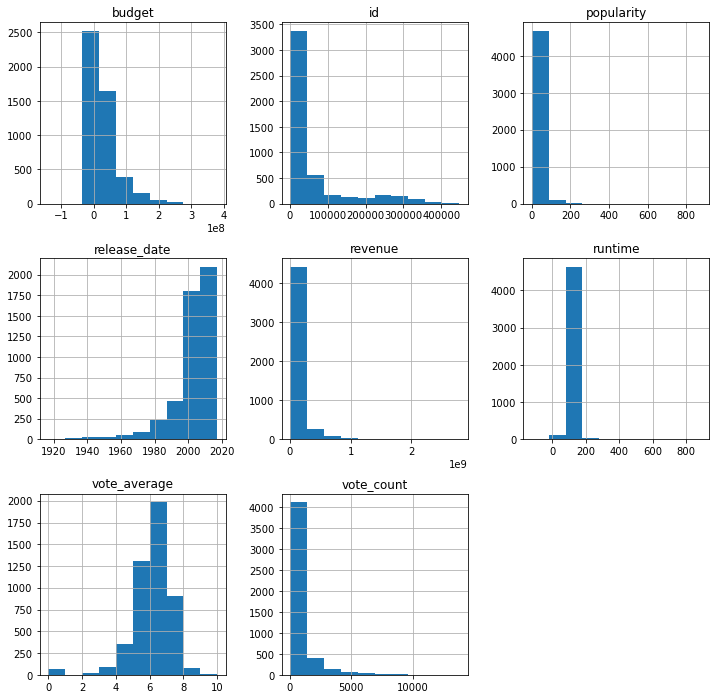

In [33]:
# The .hist() or histogram function shows the distribution for eadh of the numerical features.
# X-axis is the values in the feature and y-axis is how many or the counts.
df_data.hist(figsize = [12, 12]);
# A few observations:
# A larg amount of entries close to the 0 budget.
# Note on the range that the .hist() function is using for the x-values. 
# Release_date: most data is post 1980.
# The x-axis of the runtime goes up to 800.

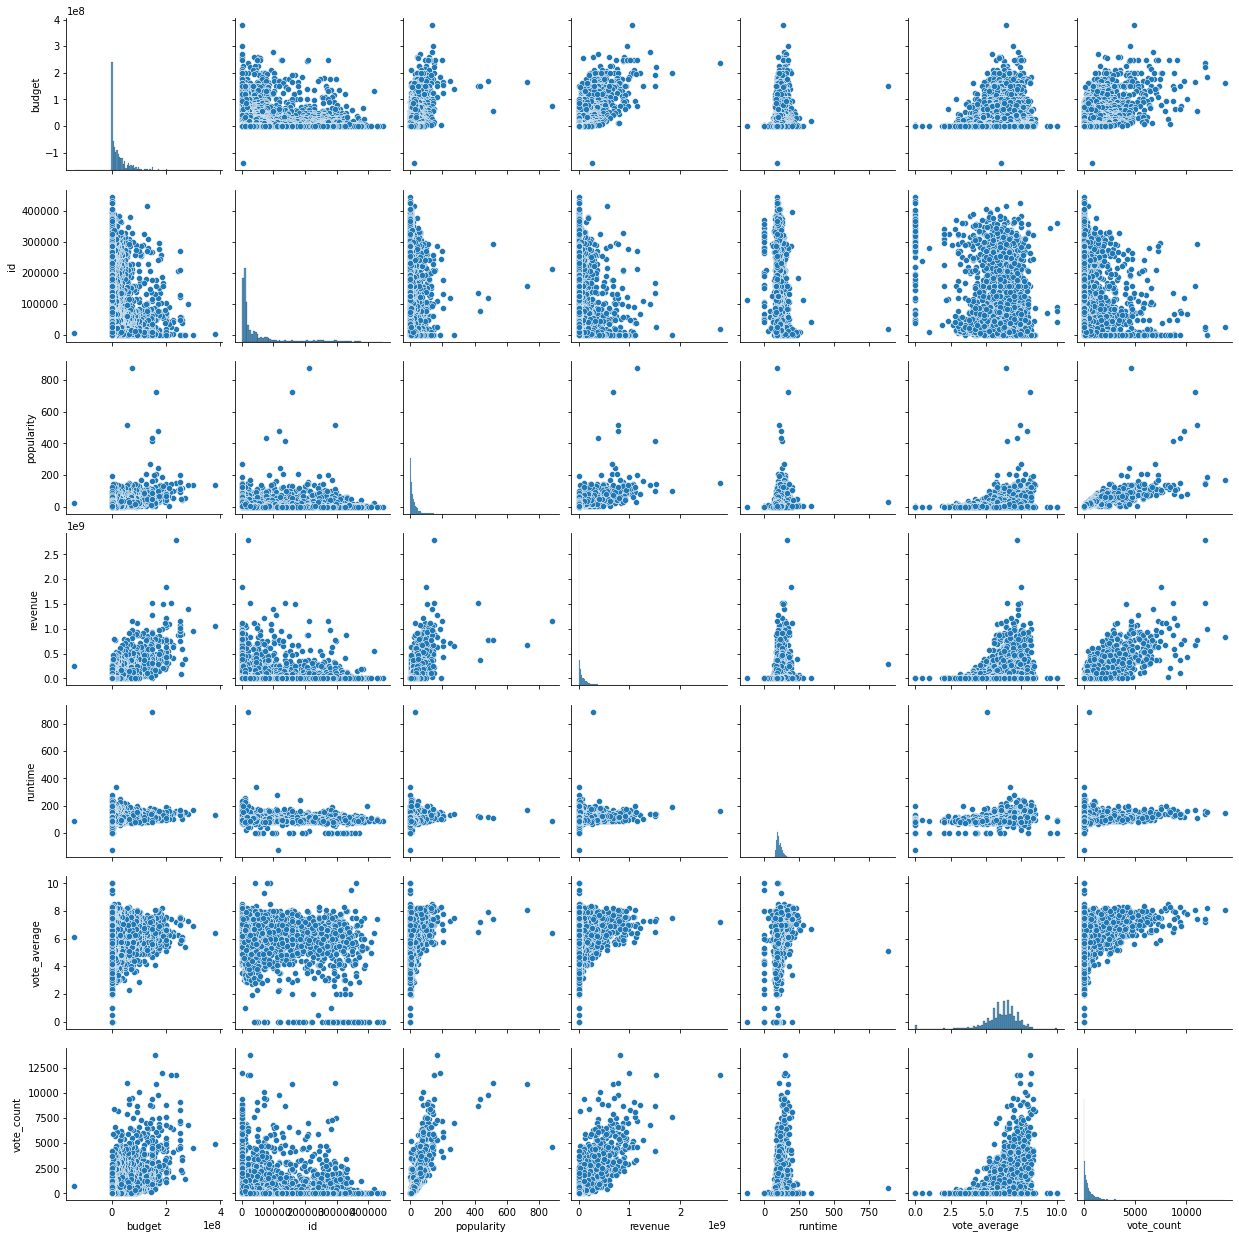

In [34]:
# The sns.pairplot() plots the relationship between any-two features. See documentation for other useful parameters.
# This can be used also for selecting which features may provide useful clusters or may be correlated.
# Note that if there are too many numberical features may be difficult to visualize. 
sns.pairplot(df_data);
# A few notes:
# Initially may be easier to evaluate the feature only on the y-axis and identify outliers.
# Budget row seems to show negative value that do not make sense regardless of the column.
# Popularity seems to have a few outliers with very large values.
# Revenue seems to show one large value that is outside of the cluster.
# Runtime row seems to show one very large value and negative values that are outside of the cluster.

In [35]:
df_data.describe() # Statistics only for numerical features.
# If we had run the .describe prior to addressing the runtime feature string issue, runtime would not have been included.\

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4796.0000,4796.0000,4796.0000,4796.0000,4796.0000,4796.0000,4796.0000
mean,28990286.3884,56901.9835,21.5165,82341967.7406,107.0847,6.0953,690.7738
std,40731679.1771,88263.3114,31.8307,162943075.3437,25.3053,1.1854,1235.0705
min,-140000000.0000,5.0000,0.0004,0.0000,-124.0000,0.0000,0.0000
25%,800000.0000,9011.2500,4.6971,0.0000,94.0000,5.6000,54.0000
50%,15000000.0000,14596.5000,12.9391,19194472.0000,104.0000,6.2000,236.0000
75%,40000000.0000,58446.2500,28.3506,92938861.0000,118.0000,6.8000,737.2500
max,380000000.0000,447027.0000,875.5813,2787965087.0000,888.0000,10.0000,13752.0000


Notes on the statistics of the movie numerical feature:

'ID' is a unique value for each movies and statistics are not useful. Note that by default describe() function will caluclate statistics for all numerical columns.

Zero values: The source data mentions that many features have zero values and it may be appropriate to treat these values as missing or null values.

Budget feature:
- Has a negative values which should not be possible. We may want to drop records that have negative budget. We may want to explore threshold were positive numbers in the budget make sense. For example, do we want to keep movies with a $0 budget?

Runtime feature:
- There seem to have movies with negative runtime which are also not possible.
- Max runtime of 888 also seems troublesome. It is much higher than 107 minutes average, way beyond standard deviation and most probably an error.

Revenue feature:
- There seemed to be at least one value with extremely high value.

Other features and statistics:
- There may be other issues (e.g., with popularity, vote_average or vote_count).
- Since these are more difficult to understand we may need a subject matter expert familiar with the data to identify issues.

For the purposes of this data cleaning we will assume that Budget, Revenue and Runtime features values of 0 are missing values and negative values are errors.

There may be a few ways to approach and handle this:
1. We could leave the data with these null/missing values. If using it for later analysis, visualizations, trending or as training data for ML we can filter it out. This will allow using the other features that are not null with the caveat that the records or entries with missing values may not be useful in some applications.
2. We can decide to remove them.

For the purposes of this notebook we will remove them.

In [36]:
# Before filtering out the values less than 0. Let's explore the other identified issue of very large runtimes.
# Lets do a value_counts but creating a few bins to be able to evaluate the range of the runtime values.
# Note that including infinity in lower/upper bound may remove null values.
# However, null values were evaluated previously and runtime feature had none.
df_data['runtime'].value_counts(bins = [-np.inf, 0, 100, 200, 300, np.inf], sort = False, dropna = False) 
# Note that there are two entries that have runtime values larger than 300.

(-inf, 0.0]         32
(0.0, 100.0]      2052
(100.0, 200.0]    2696
(200.0, 300.0]      14
(300.0, inf]         2
Name: runtime, dtype: int64

In [37]:
# We can individually evaluate entries with runtime larger than 300 filetering data as follows.
df_data[df_data['runtime'] > 300]
# We can try to search the runtime to make sure it is correct.
# Or we can decide that these are outliers that are not needed for our tasks.
# In the case of the runtime = 888 this seems to be an error as is more than twice the value of the second highest value.
# Lets remove any values that go beyond 350 minutes runtime.

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
130,150000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 10751, ""name"": ""Family""}, {""id"": 35, ""name"": ""Comedy""}]",19585,en,G-Force,"A team of trained secret agent animals, guinea pigs Darwin, Juarez, Blaster, mole Speckles, and fly Mooch takes on a mission for the US government to stop evil Leonard Saber, who plans to destroy the world with household appliances. But the government shuts them down and they are sentenced to a pet shop. Can they escape to defeat the villain and save the world?",26.7104,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Whamaphram Productions"", ""id"": 3639}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2009-07-21,292817841,888,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,5.1000,510
2383,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name"": ""Thriller""}, {""id"": 36, ""name"": ""History""}]",43434,en,Carlos,"The story of Venezuelan revolutionary, Ilich Ramirez Sanchez, who founded a worldwide terrorist organization and raided the OPEC headquarters in 1975 before being caught by the French police.",1.1384,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}, {""name"": ""Canal+"", ""id"": 5358}, {""name"": ""Arte France"", ""id"": 6111}, {""name"": ""Films en Stock"", ""id"": 11394}]","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso_3166_1"": ""DE"", ""name"": ""Germany""}]",2010-05-19,871279,338,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, {""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u0639\u0631\u0628\u064a\u0629""}, {""iso_639_1"": ""hu"", ""name"": ""Magyar""}, {""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a9e""}, {""iso_639_1"": ""ru"", ""name"": ""P\u0443\u0441\u0441\u043a\u0438\u0439""}]",Released,6.7000,50


In [38]:
# Before filtering out the values let's evaluate the values of revenue as there seemed to be one very large value.
# Initial bins were developed using the 25 and 75 percentiles and max values for revenue. 
df_data['revenue'].value_counts(bins = [-np.inf, 0, 2e7, 1e8, 1e9, 1.5e9, 2e9, 3e9, np.inf], 
                                sort = False, 
                                dropna = False)
# Notes:
# Even though graphically there was one potential extreme outlier, it does not seem as extreme when expressed numerically. 

(-inf, 0.0]                     1421
(0.0, 20000000.0]               1008
(20000000.0, 100000000.0]       1242
(100000000.0, 1000000000.0]     1104
(1000000000.0, 1500000000.0]      16
(1500000000.0, 2000000000.0]       4
(2000000000.0, 3000000000.0]       1
(3000000000.0, inf]                0
Name: revenue, dtype: int64

In [39]:
# Let's filter for the max revenue item.
df_data[df_data['revenue'] == df_data['revenue'].max()]
# I am not a movie SME but do know the movie Avatar may be in the top highest grossing movies.
# Will  not remove this datapoint.

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.4376,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,7.2000,11800


In [40]:
# Lets use a data filtering approach to filter out the values that were determined to be dropped.
print(df_data.shape)
df_data = df_data.loc[(df_data['budget'] > 0) &
                      (df_data['revenue'] > 0) &
                      (df_data['runtime'] > 0) &
                      (df_data['runtime'] <= 350)
                     ].reset_index(drop=True)
print(df_data.shape)
# This will drop the dataframe from 4798 entries to 3226.

(4796, 16)
(3226, 16)


### Non-Numerical Categorical Features
This dataset has non-numerical categorical features in two formats. First, some features (e.g., original language, status) only have a single value. In others features an entry may have multiple values that may be applicable. In this dataset, these features with multiple values (e.g., genres, keywords, production_companies, production_countries and spoken_language) use a JSON or dictionary like format to capture the values.

For the purposes of this notebook the statistics and cleaning will be separated in their own sections as the preparation and data manipulation will be different.

In [41]:
# Review the columns.
df_data.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'vote_average', 'vote_count'],
      dtype='object')

#### Non-Numerical Categorical Features: One-Hot-Encoding
In some cases it may be beneficial to convert a data feature to one-hot-encoding format. Typically, a feature that has categorical values (e.g., genres, original language) can be converted to one-hot-encoding. The following sections explores cleaning of non-numerical categorical feataures and where appropriate convert to one-hot-encoding. The decision on which column to convert to one-hot-encoding comes with experience. One of the main reasons to convert to one-hot-encoding format is in preparation for features that will be used as part of post data cleaning analyses (e.g., classification tasks).

#### Non-Numerical Categorical Features: Statistics and Cleaning
This section looks at those non-numerical categorical features that only have one value per entry. These include status and original_language.

In [42]:
df_data['status'].value_counts(normalize = False, sort = True, ascending = True, dropna = False).head(5)
# Only one movie in post production and the rest are in released status.
# Post production is clearly underrepresented.
# The original data had a few more movies as post production and rumored but those entries were dropped in previous steps.
# Since this is a feature that does not provide much information lets first drop this record and then the feature.

Post Production       1
Released           3225
Name: status, dtype: int64

In [43]:
print(df_data.shape)
df_data = df_data[df_data.status != 'Post Production'] # Dropping rows different than 'Post Production'
print(df_data.shape)

# Remember when droping rows to reset index.
df_data = df_data.reset_index(drop=True)

(3226, 16)
(3225, 16)


In [44]:
# Now let's drop the 'status' feature since it only has movies that have been released.
print(df_data.shape)
df_data = df_data.drop(columns=['status'])
print(df_data.shape)

(3225, 16)
(3225, 15)


#### Non-Numerica Categorical Features JSON Like Format: Statistics and Cleaning

Extract genre information as a feature or features. Note the dictionary has the id and the name. There may be a few ways to do this. Create a list of all the location 3 in the dictionary, then create all this list as columns and when contains put a 1. Extract List and Dictionary Data (note this may be similar with the multiple SPO). https://stackoverflow.com/questions/65544954/pandas-extract-values-from-a-column-with-multiple-list-of-dictionaries-and-spli


In [45]:
unique_genres = [] # Initiate empty list

# Iterates thru every row.
for row in range(len(df_data)):
    # Progress status. Will not make difference in these as processing a few thousand records is fast.
    progress_status(step = row, total_steps = len(df_data)-1)
    
    cell_contents = json.loads(df_data.iloc[row]['genres']) # Loads cell data as json data.
    # Consolidate new list with old list and remove duplicates with list(set())).
    unique_genres = list(set((unique_genres + [item.get('name') for item in cell_contents])))
    unique_genres.sort() # Sort list alphabetically

Currently processing step: 3224 of 3224.


In [46]:
print(f'There are a total of {len(unique_genres)} unique genres: \n{unique_genres}.')

There are a total of 19 unique genres: 
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'].


In [47]:
# Iterate thru the values of the unique_genres in order to create a column for each genre and the one hot encoding. 
for element in unique_genres:
    # Progress status. This loop takes about a dozen seconds so you will see teh process increasing below.
    progress_status(step = unique_genres.index(element), total_steps = len(unique_genres)-1)
    
    to_one_hot_encoding(df_name = df_data, 
                        item_to_search = element, 
                        col_to_search = 'genres', 
                        new_col_value = element)

Currently processing step: 18 of 18.


In [48]:
# Lets do a sampling of the dataframe with genres column and the unique_genres columns. 
# This will allow to do a few manual spot checks on the one-hot-encoding.
df_data.loc[:,['genres']+unique_genres].sample(n = 2)

,genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
48,"[{""id"": 28, ""name"": ""Action""}, {""id"": 10751, ""name"": ""Family""}, {""id"": 14, ""name"": ""Fantasy""}]",1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2759,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name"": ""History""}]",0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


# Derived Features: Date Related
For deriving date related features to work, the date feature (e.g., release_date) needs to be parsed as dates in either in the data loading step or afterwards setting the data type as date. 

In [49]:
df_data.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'vote_average', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'],
      dtype='object')

In [50]:
# Show max() and min() date ranges.
print('Date range is {:%d/%m/%Y} to {:%d/%m/%Y}'.format(df_data['release_date'].min(), df_data['release_date'].max()))
# Because the date range is so large, I typically find it easier to evaluate issues with the year or month individually.
# This helps find high level issues and limitations.
# Trying to evaluate every single day individually may not be plausible.
# The goal is to quickly identify potential data limitations and suppor cleaning.

Date range is 04/09/1916 to 09/09/2016


### Derived Feature: Release Calendar Year (release_cy)

In [51]:
df_data['release_cy'] = df_data['release_date'].dt.to_period('Y')

In [52]:
df_data['release_cy'].value_counts(dropna = False).sort_index(ascending = False).head(10)

2016     72
2015    121
2014    135
2013    152
2012    137
2011    166
2010    162
2009    153
2008    145
2007    124
Freq: A-DEC, Name: release_cy, dtype: int64

In [53]:
df_data['release_cy'].value_counts(dropna = False).sort_index().head(10)
# There seem to be years not represented for example between 1917 to 1924 and 1928, 1931.
# There are various ways to address these missing years if we would be calculating trends or forecasting.
# This include but not limited to taking the average data of adjacent years. 
# For example lets say we wanted to calculate the revenue of 1928. We could use the average of 1927 and 1929.
# We could also use forecasting using a regression and use the forecasted values for those years.

1916    1
1925    1
1927    1
1929    1
1930    1
1932    1
1933    2
1934    1
1935    1
1936    2
Freq: A-DEC, Name: release_cy, dtype: int64

### Derived Feature: Release Calendar Year Quarter (release_cy_quarter)

In [54]:
df_data['release_cy_quarter'] = pd.PeriodIndex(df_data.release_date, freq = 'Q')

# Alternative way to convert is using the approach of the CY.
#df_data['release_cy_quarter'] = df_data['release_cy_quarter'].dt.to_period('Q')

In [55]:
df_data['release_cy_quarter'].value_counts(dropna = False).sort_index(ascending = False).head(10)

2016Q3    13
2016Q2    28
2016Q1    31
2015Q4    30
2015Q3    39
2015Q2    26
2015Q1    26
2014Q4    43
2014Q3    35
2014Q2    24
Freq: Q-DEC, Name: release_cy_quarter, dtype: int64

In [56]:
df_data['release_cy_quarter'].value_counts(dropna = False).sort_index().head(10)
# Expect the same issue as the CY were there will be quarters that are not represented.

1916Q3    1
1925Q4    1
1927Q1    1
1929Q1    1
1930Q4    1
1932Q4    1
1933Q1    2
1934Q1    1
1935Q3    1
1936Q1    1
Freq: Q-DEC, Name: release_cy_quarter, dtype: int64

### Derived Feature: Release Calendar Year Month (release_cy_month)

In [57]:
df_data['release_cy_month'] = pd.PeriodIndex(df_data.release_date, freq = 'M')

# Alternative way to convert is using the approach of the CY.
#df_data['release_cy_month'] = df_data['release_cy_month'].dt.to_period('M')

In [58]:
df_data['release_cy_month'].value_counts(dropna = False).sort_index(ascending = False).head(10)

2016-09     1
2016-08     3
2016-07     9
2016-06    12
2016-05     8
2016-04     8
2016-03     7
2016-02    11
2016-01    13
2015-12     8
Freq: M, Name: release_cy_month, dtype: int64

In [59]:
df_data['release_cy_month'].value_counts(dropna = False).sort_index().head(10)
# Expect the same issue as the CY were there will be quarters that are not represented.

1916-09    1
1925-11    1
1927-01    1
1929-02    1
1930-11    1
1932-12    1
1933-02    2
1934-02    1
1935-09    1
1936-02    1
Freq: M, Name: release_cy_month, dtype: int64

### Derived Feature: Fiscal Years 
To create Fiscal Year it is the same as above but adjust the period as follows:

df_data['FY'] = df_data['DATE_FEATURE'].dt.to_period('A-SEP') # Annual-FY starting in September.

Since movie releases do not have fiscal years there is no point on creating a 'release_fy' feature. However, for business data you may want to change. FY quarters would change the 'A-SEP' to 'Q-SEP'. Reading the datetime.to_period documentation will provide documentation on how to address.

# Derived Feature: Box Office Earning: Revenue Plus Budget
As explained in the analysis goals above, could use budget and revenue to calculate box office earnings. Per definition the  box_office_earnings seem to be equal to revenue plus budget. A subject matter expert (SME) familiar with the data may be able to provide further advice on which metrics would be useful. 

In [60]:
# Creates the derived box_office_earnings column from the addition of budget and revenue.
df_data['box_office_earning'] = df_data['budget'] + df_data['revenue']

In [61]:
df_data['box_office_earning'].describe() 
# Note the minimum is very small which may mean that there are numbers in budget and revenue that may not be correct.
# Determining a threshold on what is a credible box_office_earning would need to be determined by an SME.
# Will not drop anymore entries.

count         3225.0000
mean     161726281.9243
std      219880791.3737
min             12.0000
25%       34737911.0000
50%       88100000.0000
75%      196000000.0000
max     3024965087.0000
Name: box_office_earning, dtype: float64

# Derived Feature: Revenue Budget Ratio
As explained in the analysis goals above, could use revenue and budget to calculate a revenue/budget ratio. A subject matter expert (SME) familiar with the data may be able to provide further advice on which metrics would be useful. 

In [62]:
# Creates the derived box_office_earnings column from the addition of budget and revenue.
df_data['revenue_budget_ratio'] = df_data['revenue']/df_data['budget']

In [63]:
df_data['revenue_budget_ratio'].describe()
# A revenue_budget_ratio of 0 makes sense only if the revenue is 0.
# Determining a threshold on what is a credible revenue to budget ratio would need to be determined by an SME.
# Will not drop anymore entries.

count      3225.0000
mean       2958.4857
std      150703.4648
min           0.0000
25%           1.0225
50%           2.3016
75%           4.4211
max     8500000.0000
Name: revenue_budget_ratio, dtype: float64

### Non-Numerical Text Features: Statistics and Cleaning
This section is to evaluate non-numerical text features and try to identify issues and errors. This is a little more difficult as these calculations and statistics may have to be developed. Some things that may be worthwhile to include:
- Calculating the statistics of the lenghts (by word or characters) of text features (e.g., title and overviews). Evaluate if  there any extreme values (e.g., short overviews) that don't provide useful information and may be worth dropping?
- Could try to find special characters within title and overview of the entries? This could imply that the wrong encoding was used when loading the data or potential errors in the data? 

Same or further analysis can be done after text normalization. There is also the potential to identify some issues during natural language processing analysis (e.g., wordcloud, text clustering, topic modeling) that may identify other entries that may be worth droping.

In order to accomplish this we will do the following:
- Let's create a new dataframe that includes some text statistics.
- Calcualte word statistic include the number of words for title and for overview features
- Calculate characters statistics include the number of characters for title and overview features
- Can then use the 
- If need be can merge this new dataframe into the old one. Note that this is an example of where the reset_index will make a difference and could cause issues and be explained below.

In [64]:
# Let's create an empty dataframe for the statistics.
df_data_text_stats = pd.DataFrame()
df_data_text_stats.head() # Returns empty DF

""


In [65]:
# Creates features for the character counts.
# Applies a lambda function to develop the character count using the lenght of the string.
df_data_text_stats['title_char_count'] = df_data['original_title'].apply(lambda x: len(str(x)))
df_data_text_stats['overview_char_count'] = df_data['overview'].apply(lambda x: len(str(x)))

# Creates features for the word counts.
# There may be a few ways to do this. In this case we count the number of spaces.
# If there is a cell with no spaces it means it has 1 word as we do not have null values in these two features.
df_data_text_stats['title_word_count'] = df_data['original_title'].str.count(' ') + 1
df_data_text_stats['overview_word_count'] = df_data['overview'].str.count(' ') + 1

In [66]:
df_data_text_stats.tail() # DF of characters and word counts. Showing the tail of DF.

,title_char_count,overview_char_count,title_word_count,overview_word_count
3220,6,245,1,40
3221,14,241,2,36
3222,3,337,1,58
3223,6,405,1,64
3224,11,338,2,62


In [67]:
df_data_text_stats.describe(percentiles = [0.05, 0.25, 0.5, 0.75]) 
# Using the describe function with additional 5% percentile to evaluate stats of the text data.
# In this case, very low numbers may be worth evaluating.
# Depending on the dataset the thresholds to evaluate may change.
# Determining the threshols should be an SME familiar with the dataset.

,title_char_count,overview_char_count,title_word_count,overview_word_count
count,3225.0000,3225.0000,3225.0000,3225.0000
mean,15.1423,303.1212,2.7445,51.8127
std,8.4695,151.8330,1.6324,26.1007
min,1.0000,41.0000,1.0000,6.0000
5%,5.0000,113.2000,1.0000,19.0000
25%,9.0000,185.0000,2.0000,32.0000
50%,13.0000,287.0000,2.0000,48.0000
75%,19.0000,389.0000,3.0000,66.0000
max,83.0000,1000.0000,13.0000,175.0000


In [68]:
# Title Character Stats:
# Expect the titles to be short. The min number of characters in the title is 1.
# The loest 5th percentile has 5 characters. 
# We may want to evaluate by filtering the lowest 5th percentile, sort ascending and see if there is any with errors.

# Overview Character Stats:
# We can see that the minimum character count in the overview is 41 characters.
# The mean is 303 characters.
# The lowest 5th percentile has 41 characters which although short seems plausible.

# Title Character Stats:
# Expect titles to have only one word.

# Overview Word Stats:
# Min word lenght in an overview is 6 words. This may be one we may want to check.
# We may want to check all entries with an overview shorter than 10 words.
# Note that we will have another opportunity to explore the normalized overview text data later. 

# Since we have already cleaned out many entries we may have already achieved a good dataset.
# There may not be many errors in the last features we are evaluating.

In [69]:
# Considerations for concatenating the df_data_text_stats and add these features to the df_data: 
# We need to make sure indexes match.
# This is one example where the reset_index needs to be used, otherwise the indexes may not match.
# Concatenating one DF with the other will result in matching the wrong entries with the wrong data.

In [70]:
# Let's make sure that our data matches.
print('df_data') 
print(f'{df_data.shape[0]} rows \n{df_data.index}.')
print('____________________________________________')
print('df_data_text_stats')
print(f'{df_data_text_stats.shape[0]} rows \n{df_data_text_stats.index}.')

# Let's use an If statement: If the rows or the index stop do not match the Warning will be printed.
if (df_data.shape[0] != 
    df_data_text_stats.shape[0]) or (df_data.index[1] != 
                                     df_data_text_stats.index[1]):
    print('WARNING! WARNING! WARNING! INDEXES OF A DF MAY NEED RESETTING')

df_data
3225 rows 
RangeIndex(start=0, stop=3225, step=1).
____________________________________________
df_data_text_stats
3225 rows 
RangeIndex(start=0, stop=3225, step=1).


In [71]:
# Concatenating the two dataframes will allow us to filter the main dataframe with word/character statistic values.
# Concatenates the two dataframes. Adds the two df_data_text_stats as columns in the end.
df_data = pd.concat([df_data, df_data_text_stats], axis = 1, ignore_index=False)
# Could also use the .insert() function.
# Copy the columns of interest from df_data_text_stats and insert them into the df_data.

In [72]:
# Visualize the data of the four features and spot check.
df_data.loc[:,['original_title', 'overview']+df_data_text_stats.columns.to_list()].sample(n = 3)
# The .samle() function is similar to the .head but randomly selects rows.
# This allows us to do random spot checks in 5 rows in this case.

,original_title,overview,title_char_count,overview_char_count,title_word_count,overview_word_count
1623,Ride Along,"For the past two years, high-school security guard Ben has been trying to show decorated APD detective James that he's more than just a video-game junkie who's unworthy of James' sister, Angela. When Ben finally gets accepted into the academy, he thinks he's earned the seasoned policeman's respect and asks for his blessing to marry Angela. Knowing that a ride along will demonstrate if Ben has what it takes to take care of his sister, James invites him on a shift designed to scare the hell out of the trainee. But when the wild night leads them to the most notorious criminal in the city, James will find that his new partner's rapid-fire mouth is just as dangerous as the bullets speeding at it.",10,700,2,124
2139,Wag the Dog,"During the final weeks of a presidential race, the President is accused of sexual misconduct. To distract the public until the election, the President's adviser hires a Hollywood producer to help him stage a fake war.",11,217,3,36
1781,Underworld,"Vampires and werewolves have waged a nocturnal war against each other for centuries. But all bets are off when a female vampire warrior named Selene, who's famous for her strength and werewolf-hunting prowess, becomes smitten with a peace-loving male werewolf, Michael, who wants to end the war.",10,295,1,47


In [73]:
print(f"There are {df_data[df_data['overview_word_count'] <= 10].shape[0]} entries with overview less than 10 words.")
df_data[df_data['overview_word_count'] <= 10].head(10)
# Checking these overview narratives even though short may still be acceptable.
# Will not drop any entries.

There are 6 entries with overview less than 10 words.


,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,Western,release_cy,release_cy_quarter,release_cy_month,box_office_earning,revenue_budget_ratio,title_char_count,overview_char_count,title_word_count,overview_word_count
1264,34000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name"": ""History""}]",1883,en,Malcolm X,The biopic of the controversial and influential Black Nationalist leader.,19.8228,"[{""name"": ""JVC Entertainment"", ""id"": 182}, {""name"": ""40 Acres & A Mule Filmworks"", ""id"": 4319}, {""name"": ""Warner Bros."", ""id"": 6194}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",1992-11-18,...,0,1992,1992Q4,1992-11,82169908,1.4168,9,73,2,10
1310,35000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10402, ""name"": ""Music""}]",6575,en,Walk Hard: The Dewey Cox Story,Singer Dewey Cox overcomes adversity to become a musical legend.,10.7352,"[{""name"": ""Columbia Pictures Corporation"", ""id"": 441}, {""name"": ""Apatow Productions"", ""id"": 10105}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-12-21,...,0,2007,2007Q4,2007-12,53317151,0.5233,30,64,6,10
1515,28000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""name"": ""Drama""}]",318846,en,The Big Short,The men who made millions from a global economic meltdown.,57.5185,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""name"": ""Plan B Entertainment"", ""id"": 81}, {""name"": ""Regency Enterprises"", ""id"": 508}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2015-12-11,...,0,2015,2015Q4,2015-12,161346506,4.7624,13,58,3,10
1910,20000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name"": ""History""}]",2428,en,The Greatest Story Ever Told,All-star epic retelling of Christ's life.,3.0112,"[{""name"": ""George Stevens Productions"", ""id"": 13579}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",1965-02-15,...,0,1965,1965Q1,1965-02,35473333,0.7737,28,41,5,6
3017,2000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}]",33667,en,Gentleman's Agreement,A magazine writer poses as a Jew to expose anti-Semitism.,5.3815,"[{""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",1947-11-11,...,0,1947,1947Q4,1947-11,9800000,3.9000,21,57,2,10
3115,1000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name"": ""Action""}, {""id"": 37, ""name"": ""Western""}, {""id"": 10402, ""name"": ""Music""}, {""id"": 10749, ""name"": ""Romance""}]",39833,en,Love Me Tender,Elvis Prestley's first film is a Civil War drama.,1.4443,"[{""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",1956-11-15,...,1,1956,1956Q4,1956-11,10000000,9.0000,14,49,3,9


# Text Data Normalization

### Derived Feature: Combination of Original Title and Overview
Before we perform text data normalization we will combine the text of the 'original_title' and the text of the 'overview'. This will result in a narrative that will read "Title of the movie: Overview". We can then use this composite text to do analytics later on.

In [74]:
df_data['original_title_overview'] = df_data['original_title'] + ': ' + df_data['overview']

In [75]:
# Let's spot check a few samples.
df_data[['original_title', 'overview', 'original_title_overview']].sample(n = 2)

,original_title,overview,original_title_overview
1229,Reindeer Games,"After assuming his dead cellmate's identity to get with his girlfriend, an ex-con finds himself the reluctant participant in a casino heist.","Reindeer Games: After assuming his dead cellmate's identity to get with his girlfriend, an ex-con finds himself the reluctant participant in a casino heist."
1207,Virgin Territory,"The film is set in Tuscany during the Black Death. As in the Decameron, ten young Florentines take refuge from the plague. But instead of telling stories, they have lusty adventures, bawdy exchanges, romance and swordplay. There are randy nuns, Saracen pirates, and a sexy cow.","Virgin Territory: The film is set in Tuscany during the Black Death. As in the Decameron, ten young Florentines take refuge from the plague. But instead of telling stories, they have lusty adventures, bawdy exchanges, romance and swordplay. There are randy nuns, Saracen pirates, and a sexy cow."


# Text Normalization
This part may be considered part of Natural Language Processing (NLP). However, since I am creating a derived feature with normalized text I typically include this as part of my data cleaning, data wrangling, data transformation and data preparation. This step on text normalization includes deriving a feature with the lemmatized text and the stemmed text. Both, lemmatization and stemming are techniques to reduce words to their roots. Also, part of the text normalization step, there are stop words that are removed.

This new features can be used for wordcloud, Bag of Word models which can be used in text clustering, similarity searching and other NLP tasks.

In [76]:
# Stopwords to add need to be developed by a SME familiar with the corpus.
# These stopwords_to_add are added in pre-processing as part of the text normalization function.
stopwords_to_add = [''] # If you wanted to add a corpus related stopword list add them here.

# NLTK library stopwords
stopwords_custom = stopwords.words('english') + [x.lower() for x in stopwords_to_add]

# In some cases you want to consider 2-grams especially with the word 'no', 'not', 'nor'.
# For example 'no fire'.  Removing the word 'no' from the stopwords list allows this to occur.
remove_as_stopword = ['no', 'not', 'nor']
stopwords_custom = list(filter(lambda w: w not in remove_as_stopword, stopwords_custom))

In [77]:
print(stopwords_custom) # Comment out to see list of stopwords_custom.
# You can find these in the NLTK stopwords documentation as well.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [78]:
# Normalization of text. 
def text_normalization(text, word_reduction_method):
    text = str(text) # Convert narrative to string.
    df = pd.DataFrame({'': [text]}) # Converts narrative to a dataframe format use replace functions.
    df[''] = df[''].str.lower() # Covert narrative to lower case.
    df[''] = df[''].str.replace("\d+", " ", regex = True) # Remove numbers
    df[''] = df[''].str.replace("[^\w\s]", " ", regex = True) # Remove special characters
    df[''] = df[''].str.replace("_", " ", regex = True) # Remove underscores characters
    df[''] = df[''].str.replace('\s+', ' ', regex = True) # Replace multiple spaces with single
    text = str(df[0:1]) # Extracts narrative from dataframe.
    tokenizer = RegexpTokenizer(r'\w+') # Tokenizer.
    tokens = tokenizer.tokenize(text) # Tokenize words.
    filtered_words = [w for w in tokens if len(w) > 1 if not w in stopwords_custom] # Note remove words of 1 letter only. Can increase to higher value as needed.
    if word_reduction_method == 'Lemmatization':
        lemmatizer = WordNetLemmatizer()
        reduced_words=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in filtered_words] # Lemmatization.  The second argument is the POS tag.
    if word_reduction_method == 'Stemming':
        stemmer = PorterStemmer() # Stemming also could make the word unreadable but is faster than lemmatization.
        reduced_words=[stemmer.stem(w) for w in filtered_words]
    return " ".join(reduced_words) # Join words with space.

def get_wordnet_pos(word): # Reference: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#wordnetlemmatizer
    #"""Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [79]:
# This cell may take awhile to run depending on the number of entries and lenght of entries being normalized.
# In this dataset takes about 3 minutes.
# It reads the data in the "original_title_overview" and normalizes the text using lemmatization.
# It creates a new feature called norm_text_lemma.
print(datetime.now())
df_data['norm_text_lemma'] = df_data['original_title_overview'].apply(text_normalization, 
                                                                      word_reduction_method = 'Lemmatization')
print(datetime.now())

2022-10-09 09:48:09.425780
2022-10-09 09:49:58.213256


In [80]:
# This cell may take awhile to run depending on the number of entries and lenght of entries being normalized.
# In this dataset takes about 1 minutes. Note that stemming is much faster than lemmatization.
# It reads the data in the "original_title_overview" and normalizes the text using stemming.
# It creates a new feature called norm_text_stem.
print(datetime.now())
df_data['norm_text_stem'] = df_data['original_title_overview'].apply(text_normalization, 
                                                                      word_reduction_method = 'Stemming')
print(datetime.now())

2022-10-09 09:49:58.232483
2022-10-09 09:50:12.142947


# Export Final DataFrame
Exporting the final cleaned dataframe which can then be used as input into the other notebooks or shared with other stakeholders.

In [81]:
# TO EXPORT AS EXCEL
#df_data.to_excel (r'.\output_data\df_data_clean.xlsx', index = False, header=True) 

In [82]:
# TO EXPORT AS CSV
df_data.to_csv (r'.\output_data\df_data_clean.csv', encoding='utf-8-sig', index = False, header=True) 

# Notebook End